## Coronavirus Tweets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import spacy
import re
nlp = spacy.load('en')
import  nltk
print(nltk.__version__)

import pickle
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score




3.2.5


In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.layers import Embedding 
from keras.layers import Conv1D, GlobalMaxPooling1D, GlobalMaxPool1D
from keras.layers import LSTM

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical



In [ ]:
colorpicker = widgets.ColorPicker(
            concise = False,
            description = 'Color',
            value = 'black',
            disabled = False)

colorpicker

ColorPicker(value='black', description='Color')

## Data Understanding

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Corona_NLP_train.csv', encoding='latin1')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Corona_NLP_test.csv', encoding='latin1')

In [ ]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


#### Controllo la presenza di NaN in Location e li elimino 

In [ ]:
df['Location'].isnull().values.any()

True

In [ ]:
df_test['Location'].isnull().values.any()

True

In [ ]:
df.dropna(subset = ["Location"], inplace=True)

In [ ]:
df_test.dropna(subset = ["Location"], inplace=True)

In [ ]:
df = df.reset_index()
df = df.drop(['index'], axis = 1)

In [ ]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
4,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
...,...,...,...,...,...,...
32562,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative
32563,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative
32564,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive
32565,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral


In [ ]:
df_test = df_test.reset_index()
df_test = df_test.drop(['index'], axis = 1)

In [ ]:
df_test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
3,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
4,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral
...,...,...,...,...,...,...
2959,3793,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative
2960,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
2961,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
2962,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral


#### Osservo quali sono le prime 50 location per numero di tweets e ottengo un barplot delle prime 20

In [ ]:
df['Location'].value_counts()[:50]

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
Canada                     191
England, United Kingdom    191
Toronto, Ontario           160
Global                     159
Chicago, IL                155
California, USA            153
San Francisco, CA          152
Boston, MA                 150
New York, USA              140
New Delhi, India           138
New York                   126
Atlanta, GA                126
Mumbai, India              109
Worldwide                  101
Lagos, Nigeria              99
Austin, TX                  98
Houston, TX                 98
Texas, USA                  98
London, UK                  96
Toronto                     91
Los Angeles                 89
Nairobi,

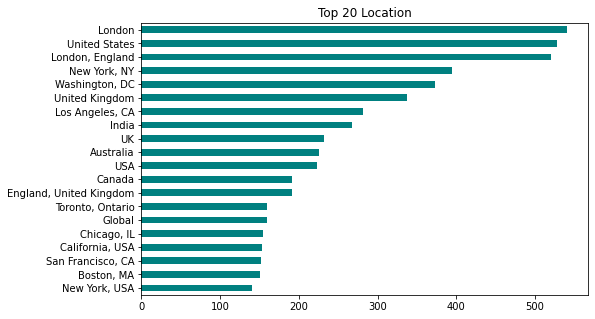

In [ ]:
plt.rcParams["figure.figsize"] = [8,5]
x = df["Location"].value_counts().iloc[:20].sort_values(ascending = True)
plt.title("Top 20 Location")
x.plot(kind = "barh", color = "teal")

#### Osservo il numero di tweets per giorno 

In [ ]:
df['TweetAt'].value_counts()

20-03-2020    2618
19-03-2020    2614
25-03-2020    2384
18-03-2020    2183
21-03-2020    2066
22-03-2020    1618
23-03-2020    1604
17-03-2020    1555
08-04-2020    1527
07-04-2020    1487
06-04-2020    1372
09-04-2020    1185
24-03-2020    1167
13-04-2020    1148
26-03-2020    1025
05-04-2020     880
10-04-2020     815
02-04-2020     779
11-04-2020     722
03-04-2020     656
04-04-2020     615
12-04-2020     593
16-03-2020     529
01-04-2020     503
27-03-2020     280
31-03-2020     253
14-04-2020     210
29-03-2020      95
30-03-2020      65
28-03-2020      19
Name: TweetAt, dtype: int64

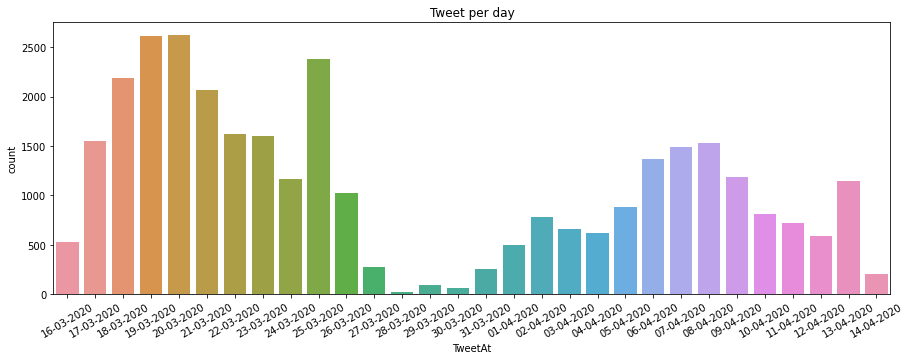

In [ ]:
plt.rcParams["figure.figsize"] = [15,5]
sns.countplot(x = 'TweetAt', data=df)
plt.xticks(rotation=30)
plt.title("Tweet per day")
plt.show()

#### Osservo la distribuzione delle varie classi (Positive, Negative, Extremely Positive, Extremely Negative, Neutral)

In [ ]:
labels = df['Sentiment'].unique()

In [ ]:
labels

array(['Neutral', 'Positive', 'Negative', 'Extremely Positive',
       'Extremely Negative'], dtype=object)

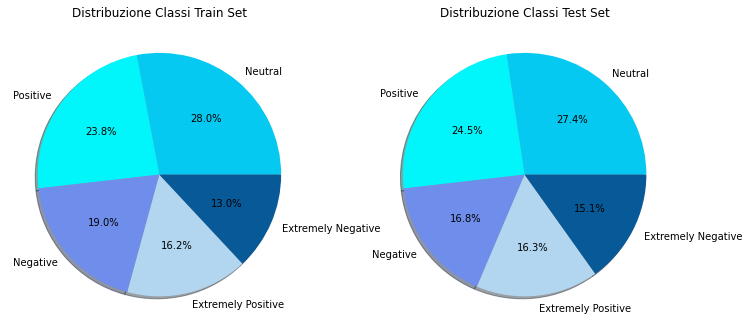

In [ ]:
plt.rcParams["figure.figsize"] = [12,8]
colors = ['#05c9f0', '#00f6fa', '#6f8eec', '#b2d5f0', '#075997']
plt.subplot(1,2,1)
plt.pie(df['Sentiment'].value_counts(), labels =labels, autopct = '%1.1f%%',colors = colors, shadow = True)
plt.title('Distribuzione Classi Train Set')
plt.subplot(1,2,2)
plt.pie(df_test['Sentiment'].value_counts(), labels =labels, autopct = '%1.1f%%', colors = colors, shadow = True)
plt.title('Distribuzione Classi Test Set')
plt.show()

## Data Classification

In [ ]:
x_train = df['OriginalTweet']


In [ ]:
y_train = df['Sentiment']

In [ ]:
x_test = df_test['OriginalTweet']

In [ ]:
y_test = df_test['Sentiment']

In [ ]:
len(x_train), len(y_train), len(x_test), len(y_test)

(32567, 32567, 2964, 2964)

In [ ]:
set(y_train)

{'Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive'}

In [ ]:
sample_idx = 142
x_train[sample_idx]

'What 2K Consumers Told PYMNTS About How COVID-19 Changed Their Daily Lives - https://t.co/hG5vYrH02L'

In [ ]:
y_train[sample_idx]

'Neutral'


#### Creo un tokenizzatore usando spacy

In [ ]:
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize, pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

stopword_list = stopwords.words('english')
punctuations = string.punctuation

def spacy_nlp_tokenizer(text):

    # substituting all space characters with a single space
    text = re.sub('\s+', ' ', text)
    # removing Url
    text = re.sub(r"\S*https?:\S*", "", text, flags=re.MULTILINE)
    #removing mention
    text = re.sub(r'@[\w]+', "", text, flags=re.MULTILINE)
    
    doc = nlp(text)
    
    # lemmatizing tokens and lowering case
    lemmas = [token.lemma_.lower() for token in doc]
    
    
    # removing stopwords and punctuations
    lemmas_nostop = [token for token in lemmas if token not in stopword_list and token not in punctuations]
    
    
    # creating ngrams
    lemma_bigrams = ['BI_'+p1+'_'+p2 for p1,p2 in nltk.ngrams(lemmas_nostop,2)]
    lemma_trigrams = ['TRI_'+p1+'_'+p2+'_'+p3 for p1,p2,p3 in nltk.ngrams(lemmas_nostop,3)]
    
    

    all_tokens = list()
    all_tokens.extend(lemmas_nostop)
    all_tokens.extend(lemma_bigrams)
    all_tokens.extend(lemma_trigrams)
    return all_tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### Vettorizzo i tweets usando come tokenizzatore spacy_nlp_tokenizer

In [ ]:
vect=CountVectorizer(analyzer=spacy_nlp_tokenizer, min_df = 5)

In [ ]:
print('fit')
# Just creating the features space. It define the dimensions.
vect.fit(x_train) 
print('transform')
#Creating the vectors
X_train_tok = vect.transform(x_train) 
print('done')


X_test_tok =vect.transform(x_test)

fit
transform
done


#### Salvo la tokenizzazione

In [ ]:
with open('tweets_x_train_tok.pkl','wb') as outfile:
    pickle.dump(X_train_tok,outfile)
with open('tweets_x_test_tok.pkl','wb') as outfile:
    pickle.dump(X_test_tok,outfile)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/tweets_x_train_tok.pkl',mode='br') as inputfile:
    X_train_tok = pickle.load(inputfile)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/tweets_x_test_tok.pkl',mode='br') as inputfile:
    X_test_tok = pickle.load(inputfile)

In [ ]:
len(vect.vocabulary_)

27041

In [ ]:
vect.vocabulary_

{'    ': 3,
 ' ': 0,
 'advice': 19804,
 'talk': 26071,
 '-pron-': 21,
 'family': 22129,
 'exchange': 22028,
 'phone': 24476,
 'number': 24125,
 'create': 21288,
 'contact': 21027,
 'list': 23510,
 'neighbour': 24033,
 'school': 25346,
 'employer': 21886,
 'chemist': 20720,
 'gp': 22579,
 'set': 25444,
 'online': 24196,
 'shopping': 25517,
 'account': 19745,
 'adequate': 19778,
 'supply': 25993,
 'regular': 25002,
 'med': 23747,
 'order': 24233,
 'BI_talk_-pron-': 13406,
 'BI_set_online': 11903,
 'BI_online_shopping': 9684,
 'BI_shopping_account': 12061,
 'TRI_online_shopping_account': 18175,
 'coronavirus': 21114,
 'australia': 20133,
 'woolworth': 26886,
 'give': 22518,
 'elderly': 21852,
 'disabled': 21604,
 'dedicated': 21434,
 'hour': 22863,
 'amid': 19935,
 'covid-19': 21212,
 'outbreak': 24258,
 'BI_give_elderly': 6904,
 'BI_elderly_disabled': 5744,
 'BI_dedicated_shopping': 5218,
 'BI_shopping_hour': 12101,
 'BI_hour_amid': 7714,
 'BI_amid_covid-19': 2497,
 'BI_covid-19_outbreak

### Classificazione con SVM

#### SVM con tokenizzazione di default di CountVectorizer

Classification report:
                    precision    recall  f1-score   support

Extremely Negative       0.60      0.58      0.59       449
Extremely Positive       0.66      0.63      0.64       482
          Negative       0.53      0.48      0.50       811
           Neutral       0.64      0.71      0.67       497
          Positive       0.50      0.55      0.53       725

          accuracy                           0.57      2964
         macro avg       0.59      0.59      0.59      2964
      weighted avg       0.57      0.57      0.57      2964

Confusion matrix:
[[260   2 150  16  21]
 [  4 302  18  14 144]
 [133  24 387  99 168]
 [  9   7  66 351  64]
 [ 26 121 105  71 402]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


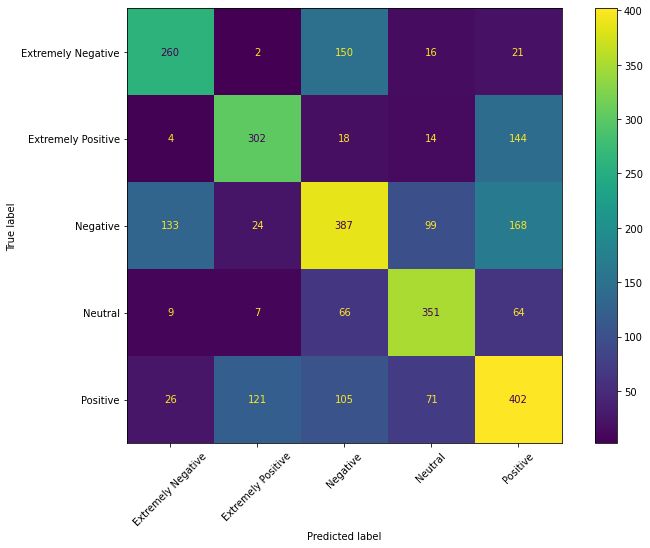

In [ ]:
svm_pipeline = Pipeline([
    ('vect', CountVectorizer(min_df = 5)), #tokenization
    ('sel', SelectKBest(chi2, k=7000)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

svm_pipeline.fit(x_train,y_train)
predictions = svm_pipeline.predict(x_test)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

plot_confusion_matrix(svm_pipeline, x_test, y_test)  
plt.xticks(rotation=45)
plt.show()

#### SVM con tokenizzazione con spacy_nlp_tokenizer senza valori optimizzati

In [ ]:
svm_pipeline = Pipeline([
    ('sel', SelectKBest(chi2, k=7000)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

svm_pipeline.fit(X_train_tok,y_train)
predictions = svm_pipeline.predict(X_test_tok)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

Classification report:
                    precision    recall  f1-score   support

Extremely Negative       0.59      0.60      0.59       449
Extremely Positive       0.64      0.63      0.63       482
          Negative       0.53      0.46      0.49       811
           Neutral       0.60      0.73      0.66       497
          Positive       0.51      0.50      0.51       725

          accuracy                           0.56      2964
         macro avg       0.57      0.58      0.58      2964
      weighted avg       0.56      0.56      0.56      2964

Confusion matrix:
[[269   4 137  20  19]
 [  8 303  24  14 133]
 [142  29 371 122 147]
 [ 10  10  63 364  50]
 [ 28 131 110  91 365]]


#### Applico una GridSearch per trovare i migliori parametri per l'SVM

In [ ]:
param_grid = [{'sel__k': [3000, 5000, 7000,'all'], 'learner__C': [0.01, 0.1, 1, 10, 100]}]

opt_pipeline = Pipeline([
    ('sel', SelectKBest(chi2)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

n_jobs = 3 #Number of jobs to run in parallel
SVM_opt_search = GridSearchCV(opt_pipeline, param_grid, cv=7, n_jobs = n_jobs, verbose=True).fit(X_train_tok,y_train)

Fitting 7 folds for each of 20 candidates, totalling 140 fits


In [ ]:
SVM_opt_search.best_params_

{'learner__C': 10, 'sel__k': 3000}

In [ ]:
SVM_opt_search.best_estimator_

Pipeline(steps=[('sel',
                 SelectKBest(k=3000,
                             score_func=<function chi2 at 0x7f713e3ed710>)),
                ('tfidf', TfidfTransformer()), ('learner', LinearSVC(C=10))])

In [ ]:
#salvo il classificatore con i migliori risultati della gridsearch
with open('/content/drive/MyDrive/Colab Notebooks/SVM_clf_optimizer.pkl',mode='bw') as outputfile:
    pickle.dump(SVM_opt_search.best_estimator_ ,outputfile)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/SVM_clf_optimizer.pkl',mode='br') as inputfile:
    SVM_opt_search.best_estimator_ = pickle.load(inputfile)

SVM_opt_search.best_estimator_

Pipeline(steps=[('sel',
                 SelectKBest(k=3000,
                             score_func=<function chi2 at 0x7f713e3ed710>)),
                ('tfidf', TfidfTransformer()), ('learner', LinearSVC(C=10))])

In [ ]:
opt_predictions = SVM_opt_search.best_estimator_.predict(X_test_tok)

print('Classification report:')
print(classification_report(y_test, opt_predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, opt_predictions)
print(cm)

Classification report:
                    precision    recall  f1-score   support

Extremely Negative       0.60      0.61      0.60       449
Extremely Positive       0.66      0.63      0.65       482
          Negative       0.57      0.48      0.52       811
           Neutral       0.61      0.79      0.69       497
          Positive       0.52      0.53      0.53       725

          accuracy                           0.59      2964
         macro avg       0.59      0.61      0.60      2964
      weighted avg       0.58      0.59      0.58      2964

Confusion matrix:
[[272   2 129  22  24]
 [  8 303  18  13 140]
 [135  25 386 125 140]
 [ 10   4  42 391  50]
 [ 28 122 105  85 385]]


#### Osservo quali feature influenzano la classificazione

In [ ]:
tokenizer = vect
selector = svm_pipeline.named_steps['sel']
classifier = svm_pipeline.named_steps['learner']

In [ ]:
feature_names = tokenizer.get_feature_names()
feats_w_score = list()
for index,(selected,score) in enumerate(zip(selector.get_support(),selector.scores_)):
    feats_w_score.append((score,selected,feature_names[index]))
feats_w_score = sorted(feats_w_score)
len(feats_w_score)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


27041

In [ ]:
feats_w_score[:100],feats_w_score[-100:]

([(0.07219712820489022, False, 'stem'),
  (0.07373543082551931, False, 'BI_-pron-_son'),
  (0.1275206311845304, False, 'italy'),
  (0.128349130386192, False, 'BI_30_day'),
  (0.128349130386192, False, 'length'),
  (0.12904198518895219, False, 'BI_cash_-pron-'),
  (0.12904198518895219, False, 'upper'),
  (0.13696621527975913, False, 'BI_elderly_people'),
  (0.14314652308441672, False, 'BI_coronavirusoutbreak_covid19'),
  (0.15433837863857952, False, 'got'),
  (0.16214479679201285, False, 'BI_new_report'),
  (0.1710651894840371, False, 'BI_-pron-_follower'),
  (0.1710651894840371, False, 'BI_address_-pron-'),
  (0.1710651894840371, False, 'BI_amp_follow'),
  (0.1710651894840371, False, 'BI_bank_open'),
  (0.1710651894840371, False, 'BI_carer_supermarket'),
  (0.1710651894840371, False, 'BI_civil_servant'),
  (0.1710651894840371, False, 'BI_continue_rise'),
  (0.1710651894840371, False, 'BI_coronaviruspandemic_coronavirusupdate'),
  (0.1710651894840371, False, 'BI_get_slot'),
  (0.1710651

In [ ]:
feats_w_classifier_weight = list()
for index,weight in enumerate(selector.inverse_transform(classifier.coef_)[0]):
    if weight!=0:
        feats_w_classifier_weight.append((weight,feature_names[index]))
feats_w_classifier_weight = sorted(feats_w_classifier_weight)
len(feats_w_classifier_weight)

6454

In [ ]:
feats_w_classifier_weight[-100:]

[(1.8264630148171026, 'deny'),
 (1.828252802292902, 'TRI_price_essential_good'),
 (1.8282623021650157, 'undermine'),
 (1.8286258045792507, 'furious'),
 (1.836600776830971, 'miserably'),
 (1.8412231892917597, 'struggle'),
 (1.8417908205635618, 'BI_-pron-_arrest'),
 (1.8420581709105255, 'wtf'),
 (1.843896655334764, 'shame'),
 (1.8489859675032343, 'starve'),
 (1.8541237533427615, 'BI_demand_destruction'),
 (1.8551965446125889, 'unfortunately'),
 (1.8559077579398393, 'tragic'),
 (1.858650389959469, 'hate'),
 (1.8626497779259947, 'cunt'),
 (1.8689140462021328, 'selfish'),
 (1.8848459224978584, 'threat'),
 (1.8885569498488652, 'TRI_hand_sanitizer_ '),
 (1.8941316308146383, 'BI_early_stage'),
 (1.8985333727720721, 'collapse'),
 (1.9022812999416994, 'bullshit'),
 (1.9142384904415517, 'terrible'),
 (1.9274048408236661, 'emergency'),
 (1.9445458164834935, 'fail'),
 (1.9466551711145454, 'cancer'),
 (1.9533108221668212, 'depression'),
 (1.9533215936635517, 'greedy'),
 (1.9564107749919757, 'blame')

In [ ]:
feats_w_classifier_weight[:100]

[(-2.3231684506454267, 'thank'),
 (-2.235162892128911, 'care'),
 (-2.2279731155347755, 'win'),
 (-2.2079264524392626, 'like'),
 (-2.2004071323190844, 'help'),
 (-2.121026847651664, 'super'),
 (-2.0470708498775703, 'great'),
 (-2.0300814476522335, 'interesting'),
 (-2.0217470612612045, 'free'),
 (-1.9242644228757704, 'share'),
 (-1.7876714496226918, 'excellent'),
 (-1.780845605820764, 'growth'),
 (-1.754787683195971, 'support'),
 (-1.7294475460285104, 'hope'),
 (-1.6711353769434605, 'laugh'),
 (-1.556108215809232, 'secure'),
 (-1.554060498763993, 'punch'),
 (-1.5539238383445835, 'BI_affect_food'),
 (-1.5440430446977196, 'strong'),
 (-1.5412611273470673, 'inspire'),
 (-1.5383356591421251, 'rich'),
 (-1.5375232800434724, 'relief'),
 (-1.5250288930417628, 'positive'),
 (-1.5219799277024193, 'BI_coronacrisis_covid19'),
 (-1.510373788529333, 'BI_spread_fake'),
 (-1.5067296137105266, 'party'),
 (-1.5056446089752789, 'relax'),
 (-1.4959846711701172, 'please'),
 (-1.4761648295721368, 'BI_hand_s

### Classificazione con Decision Tree

In [ ]:
dt_pipeline = Pipeline([
    ('sel', SelectKBest(chi2, k=7000)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', DecisionTreeClassifier())  # learning algorithm
])

dt_pipeline.fit(X_train_tok,y_train)
predictions = dt_pipeline.predict(X_test_tok)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

Classification report:
                    precision    recall  f1-score   support

Extremely Negative       0.40      0.39      0.40       592
Extremely Positive       0.45      0.45      0.45       599
          Negative       0.38      0.33      0.35      1041
           Neutral       0.46      0.51      0.49       619
          Positive       0.36      0.39      0.37       947

          accuracy                           0.40      3798
         macro avg       0.41      0.41      0.41      3798
      weighted avg       0.40      0.40      0.40      3798

Confusion matrix:
[[230  47 194  41  80]
 [ 33 269  79  33 185]
 [175  92 343 168 263]
 [ 43  22 100 317 137]
 [ 88 174 193 125 367]]


### Classificazione con Random Forest

In [ ]:
RF_pipeline = Pipeline([
    ('sel', SelectKBest(chi2, k=5000)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', RandomForestClassifier())  # learning algorithm
])

RF_pipeline.fit(X_train_tok,y_train)
predictions = RF_pipeline.predict(X_test_tok)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

Classification report:
                    precision    recall  f1-score   support

Extremely Negative       0.55      0.45      0.49       592
Extremely Positive       0.59      0.50      0.54       599
          Negative       0.46      0.42      0.44      1041
           Neutral       0.54      0.63      0.58       619
          Positive       0.41      0.49      0.45       947

          accuracy                           0.49      3798
         macro avg       0.51      0.50      0.50      3798
      weighted avg       0.49      0.49      0.49      3798

Confusion matrix:
[[266  16 203  27  80]
 [ 21 297  40  21 220]
 [134  59 437 153 258]
 [ 17   8  97 389 108]
 [ 48 124 177 134 464]]


#### Applico la GridSearch per trovare i valori migliori per i parametri

In [ ]:
param_grid = [{'sel__k': [3000, 5000, 7000], 'learner__n_estimators': [100, 300, 500]}]

opt_pipeline = Pipeline([
    ('sel', SelectKBest(chi2)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', RandomForestClassifier(bootstrap = True))  # learning algorithm
])

n_jobs = 3 #Number of jobs to run in parallel
opt_search = GridSearchCV(opt_pipeline, param_grid, cv=5, n_jobs = n_jobs, verbose=True).fit(X_train_tok,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/Users/simonamazzarino/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
opt_search.best_params_

{'learner__n_estimators': 500, 'sel__k': 3000}

In [ ]:
opt_search.best_estimator_

Pipeline(steps=[('sel',
                 SelectKBest(k=3000,
                             score_func=<function chi2 at 0x7f90c12c2d30>)),
                ('tfidf', TfidfTransformer()),
                ('learner', RandomForestClassifier(n_estimators=500))])

In [ ]:
opt_predictions = opt_search.best_estimator_.predict(X_test_tok)

print('Classification report:')
print(classification_report(y_test, opt_predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, opt_predictions)
print(cm)

Classification report:
                    precision    recall  f1-score   support

Extremely Negative       0.56      0.47      0.51       592
Extremely Positive       0.59      0.47      0.52       599
          Negative       0.48      0.42      0.45      1041
           Neutral       0.54      0.63      0.58       619
          Positive       0.42      0.52      0.46       947

          accuracy                           0.50      3798
         macro avg       0.52      0.50      0.51      3798
      weighted avg       0.50      0.50      0.50      3798

Confusion matrix:
[[278  16 193  30  75]
 [ 22 283  38  25 231]
 [133  53 436 147 272]
 [ 16  10  89 393 111]
 [ 45 118 152 137 495]]


### Classificazione con Naive Bayes Classifier

In [ ]:
NBC_pipeline = Pipeline([
    ('sel', SelectKBest(chi2, k=5000)),  # feature selection
    ('learner', MultinomialNB())  # learning algorithm
])

NBC_pipeline.fit(X_train_tok,y_train)
predictions = NBC_pipeline.predict(X_test_tok)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

Classification report:
                    precision    recall  f1-score   support

Extremely Negative       0.52      0.53      0.52       592
Extremely Positive       0.58      0.50      0.54       599
          Negative       0.44      0.41      0.42      1041
           Neutral       0.45      0.48      0.46       619
          Positive       0.41      0.46      0.43       947

          accuracy                           0.46      3798
         macro avg       0.48      0.47      0.48      3798
      weighted avg       0.47      0.46      0.47      3798

Confusion matrix:
[[314   8 181  42  47]
 [ 18 300  41  45 195]
 [197  46 424 153 221]
 [ 15  19 141 296 148]
 [ 64 143 179 129 432]]


### SVM e NBC con 3 classi (e distribuzione delle 3 classi)

In [ ]:
df['New_Sentiment'] = df['Sentiment']

cont = 0
for i in df['Sentiment']:
  if i == 'Positive':
    df['New_Sentiment'][cont] = 'Positive'
    cont+=1
  
  elif i == 'Extremely Positive':
    df['New_Sentiment'][cont] = 'Positive'
    cont+=1
  
  elif i == 'Negative':
    df['New_Sentiment'][cont] = 'Negative'
    cont+=1
  
  elif i == 'Extremely Negative':
    df['New_Sentiment'][cont] = 'Negative'
    cont+=1

  elif i == 'Neutral':
    df['New_Sentiment'][cont] = 'Neutral'
    cont+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying

In [ ]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,New_Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Positive
3,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,Positive
4,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,Positive
...,...,...,...,...,...,...,...
32562,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative,Negative
32563,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative,Negative
32564,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive,Positive
32565,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,Neutral


In [ ]:
df_test['New_Sentiment'] = df_test['Sentiment']

cont = 0
for i in df_test['Sentiment']:
  if i == 'Positive':
    df_test['New_Sentiment'][cont] = 'Positive'
    cont+=1
  
  elif i == 'Extremely Positive':
    df_test['New_Sentiment'][cont] = 'Positive'
    cont+=1
  
  elif i == 'Negative':
    df_test['New_Sentiment'][cont] = 'Negative'
    cont+=1
  
  elif i == 'Extremely Negative':
    df_test['New_Sentiment'][cont] = 'Negative'
    cont+=1

  elif i == 'Neutral':
    df_test['New_Sentiment'][cont] = 'Neutral'
    cont+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying

In [ ]:
df_test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,New_Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,Positive
2,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,Negative
3,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,Neutral
4,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral,Neutral
...,...,...,...,...,...,...,...
2959,3793,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative,Negative
2960,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,Positive
2961,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,Negative
2962,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,Neutral


In [ ]:
labels = df['New_Sentiment'].unique()

In [ ]:
labels

array(['Neutral', 'Positive', 'Negative'], dtype=object)

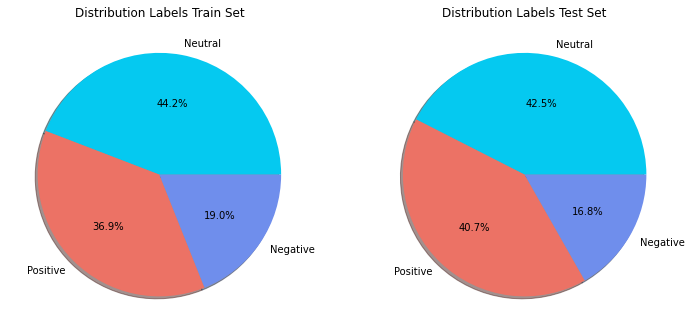

In [ ]:
plt.rcParams["figure.figsize"] = [12,8]
colors = ['#05c9f0', '#ec7265', '#6f8eec']
plt.subplot(1,2,1)
plt.pie(df['New_Sentiment'].value_counts(), labels =labels, autopct = '%1.1f%%',colors = colors, shadow = True)
plt.title('Distribution Labels Train Set')
plt.subplot(1,2,2)
plt.pie(df_test['New_Sentiment'].value_counts(), labels =labels, autopct = '%1.1f%%', colors = colors, shadow = True)
plt.title('Distribution Labels Test Set')
plt.show()

In [ ]:
y_train_tre = np.array(df['New_Sentiment'])
y_test_tre = np.array(df_test['New_Sentiment'])

Accuracy 0.8002699055330634
F1-score [0.80618893 0.72015656 0.8277551 ]
Classification report:
              precision    recall  f1-score   support

    Negative       0.83      0.79      0.81      1260
     Neutral       0.70      0.74      0.72       497
    Positive       0.82      0.84      0.83      1207

    accuracy                           0.80      2964
   macro avg       0.78      0.79      0.78      2964
weighted avg       0.80      0.80      0.80      2964

Confusion matrix:
[[ 990   97  173]
 [  73  368   56]
 [ 133   60 1014]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


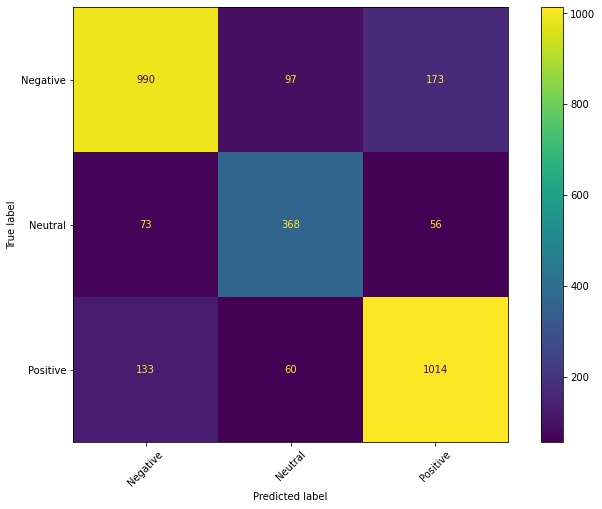

In [ ]:
svm_pipeline = Pipeline([
    ('sel', SelectKBest(chi2, k=3000)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC(C = 10))  # learning algorithm
])

svm_pipeline.fit(X_train_tok,y_train_tre)
predictions = svm_pipeline.predict(X_test_tok)


print('Accuracy %s' % accuracy_score(y_test_tre, predictions))
print('F1-score %s' % f1_score(y_test_tre, predictions, average=None))
print('Classification report:')
print(classification_report(y_test_tre, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test_tre, predictions)
print(cm)

plot_confusion_matrix(svm_pipeline, X_test_tok, y_test_tre)  
plt.xticks(rotation=45)
plt.show()

In [ ]:
NBC_pipeline = Pipeline([
    ('sel', SelectKBest(chi2, k=5000)),  # feature selection
    ('learner', MultinomialNB())  # learning algorithm
])

NBC_pipeline.fit(X_train_tok,y_train_tre)
predictions = NBC_pipeline.predict(X_test_tok)


print('Accuracy %s' % accuracy_score(y_test_tre, predictions))
print('F1-score %s' % f1_score(y_test_tre, predictions, average=None))
print('Classification report:')
print(classification_report(y_test_tre, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test_tre, predictions)
print(cm)

Accuracy 0.6828609986504723
F1-score [0.71287129 0.51515152 0.72026523]
Classification report:
              precision    recall  f1-score   support

    Negative       0.71      0.71      0.71      1260
     Neutral       0.52      0.51      0.52       497
    Positive       0.72      0.72      0.72      1207

    accuracy                           0.68      2964
   macro avg       0.65      0.65      0.65      2964
weighted avg       0.68      0.68      0.68      2964

Confusion matrix:
[[900 135 225]
 [130 255 112]
 [235 103 869]]


### Pre-processing per DNN 5 classi

In [ ]:
df['New_Sentiment'] = df['Sentiment']

cont = 0
for i in df['Sentiment']:
  if i == 'Positive':
    df['New_Sentiment'][cont] = 0
    cont+=1
  
  elif i == 'Extremely Positive':
    df['New_Sentiment'][cont] = 1
    cont+=1
  
  elif i == 'Negative':
    df['New_Sentiment'][cont] = 2
    cont+=1
  
  elif i == 'Extremely Negative':
    df['New_Sentiment'][cont] = 3
    cont+=1

  elif i == 'Neutral':
    df['New_Sentiment'][cont] = 4
    cont+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying

In [ ]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,New_Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,4
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,0
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,0
3,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,0
4,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,0
...,...,...,...,...,...,...,...
32562,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative,2
32563,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative,2
32564,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive,0
32565,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,4


In [ ]:
df_test['New_Sentiment'] = df_test['Sentiment']

cont = 0
for i in df_test['Sentiment']:
  if i == 'Positive':
    df_test['New_Sentiment'][cont] = 0
    cont+=1
  
  elif i == 'Extremely Positive':
    df_test['New_Sentiment'][cont] = 1
    cont+=1
  
  elif i == 'Negative':
    df_test['New_Sentiment'][cont] = 2
    cont+=1
  
  elif i == 'Extremely Negative':
    df_test['New_Sentiment'][cont] = 3
    cont+=1

  elif i == 'Neutral':
    df_test['New_Sentiment'][cont] = 4
    cont+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying

In [ ]:
df_test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,New_Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,3
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,0
2,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,2
3,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,4
4,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral,4
...,...,...,...,...,...,...,...
2959,3793,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative,2
2960,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,0
2961,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,2
2962,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,4


### CNN 5 classi

In [ ]:
y_train = df['New_Sentiment']
y_test  = df_test['New_Sentiment']

In [ ]:
# Convert y to OHE 
y_train = to_categorical(y_train, 5)
y_test  = to_categorical(y_test, 5)

In [ ]:
#max_features: the maximum number of words to keep, based on word frequency. 
#Only the most common num_words-1 words will be kept.
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(x_train))
#Transforms each text in texts to a sequence of integers.
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)

In [ ]:
#default batch size 32
#Optional Int, maximum length of all sequences. 
#If not provided, sequences will be padded to the length of the longest individual sequence.
maxlen = 200 
embed_size = 128 
#Pads sequences to the same length.
X_train_final = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test_final = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [ ]:
input = Input(shape=(maxlen, )) 
x   =  Embedding(max_features, embed_size)(input)
x   =  Dropout(0.2)(x)
x   =  Conv1D(10, 3, padding='valid',activation='relu', strides=1)(x)
x   =  GlobalMaxPooling1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(32, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(5, activation="softmax")(x)

In [ ]:
model = Model(inputs=input, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
cnn5 = model.fit(X_train_final, y_train, epochs=3,validation_split=0.2)
cnn5

Epoch 1/3
815/815 [==============================] - 15s 16ms/step - loss: 1.3382 - accuracy: 0.4173 - val_loss: 1.0425 - val_accuracy: 0.5797
Epoch 2/3
815/815 [==============================] - 10s 12ms/step - loss: 0.9247 - accuracy: 0.6336 - val_loss: 0.8543 - val_accuracy: 0.6698
Epoch 3/3
815/815 [==============================] - 10s 12ms/step - loss: 0.6986 - accuracy: 0.7337 - val_loss: 0.8412 - val_accuracy: 0.6712


In [ ]:
cnn5_pred = np.round(model.predict(X_test_final))

In [ ]:
print('Accuracy %s' % accuracy_score(y_test, cnn5_pred))
print('F1-score %s' % f1_score(y_test, cnn5_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn5_pred))


Accuracy 0.5745614035087719
F1-score [0.55785441 0.69291339 0.56664239 0.61360719 0.77454153]
Classification report:
              precision    recall  f1-score   support

           0       0.63      0.50      0.56       725
           1       0.66      0.73      0.69       482
           2       0.69      0.48      0.57       811
           3       0.72      0.53      0.61       449
           4       0.83      0.72      0.77       497

   micro avg       0.70      0.57      0.63      2964
   macro avg       0.71      0.59      0.64      2964
weighted avg       0.70      0.57      0.63      2964
 samples avg       0.57      0.57      0.57      2964



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


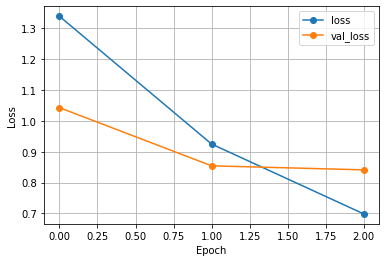

In [ ]:
plt.plot(cnn5.history['loss'], label='loss', marker = 'o')
plt.plot(cnn5.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

### LSTM 5 classi

In [ ]:
y_train = df['New_Sentiment']
y_test  = df_test['New_Sentiment']

In [ ]:
# Convert y to OHE
y_train = to_categorical(y_train, 5)
y_test  = to_categorical(y_test, 5)

In [ ]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(x_train))
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)

In [ ]:
#default batch size 32
maxlen = 200
embed_size = 128 
X_train_final = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test_final = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [ ]:
input = Input(shape=(maxlen, )) 
x   =  Embedding(max_features, embed_size)(input)
x   =  LSTM(60, return_sequences=True,name='lstm_layer')(x)
x   =  GlobalMaxPool1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(5, activation="softmax")(x)

In [ ]:
model = Model(inputs=input, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
lstm5 = model.fit(X_train_final, y_train, epochs=2,validation_split=0.2)
lstm5

Epoch 1/2
815/815 [==============================] - 169s 201ms/step - loss: 1.1355 - accuracy: 0.5255 - val_loss: 0.7757 - val_accuracy: 0.7086
Epoch 2/2
815/815 [==============================] - 136s 167ms/step - loss: 0.6428 - accuracy: 0.7716 - val_loss: 0.6393 - val_accuracy: 0.7733


In [ ]:
lstm5_pred = np.round(model.predict(X_test_final))

In [ ]:
print('Accuracy %s' % accuracy_score(y_test, lstm5_pred))
print('F1-score %s' % f1_score(y_test, lstm5_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm5_pred))


Accuracy 0.7088394062078273
F1-score [0.70808283 0.76783692 0.69260204 0.72941176 0.82480958]
Classification report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       725
           1       0.85      0.70      0.77       482
           2       0.72      0.67      0.69       811
           3       0.77      0.69      0.73       449
           4       0.90      0.76      0.82       497

   micro avg       0.76      0.71      0.74      2964
   macro avg       0.78      0.71      0.74      2964
weighted avg       0.77      0.71      0.74      2964
 samples avg       0.71      0.71      0.71      2964



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


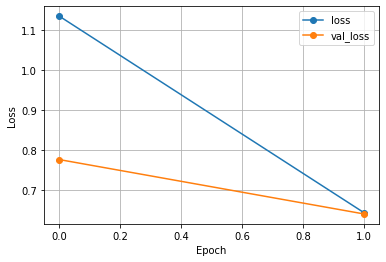

In [ ]:
plt.plot(lstm5.history['loss'], label='loss', marker = 'o')
plt.plot(lstm5.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

###Caricamento pretrained embedding FastText

In [ ]:
import codecs
#load embeddings
print('loading word embeddings...')
#dictionary where the keys will be words and the values will be coefficients 
embeddings_index = {}
f = codecs.open('../content/drive/MyDrive/Colab Notebooks/crawl-300d-2M.vec', encoding='utf-8')
for line in f:
    #values returns a list where the first element is a word and the others are the vector coefficients for that word
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index))

loading word embeddings...
found 1999996 word vectors


In [ ]:
with open('../content/drive/MyDrive/Colab Notebooks/embeddings_index.pkl',mode='bw') as outputfile:
    pickle.dump(embeddings_index ,outputfile)

In [ ]:
with open('../content/drive/MyDrive/Colab Notebooks/embeddings_index.pkl',mode='br') as inputfile:
    embeddings_index= pickle.load(inputfile)

### Preparazione DNN 5 classi con FastText

In [ ]:
y_train = df['New_Sentiment']
y_test  = df_test['New_Sentiment']

In [ ]:

y_train = to_categorical(y_train, 5)
y_test  = to_categorical(y_test, 5)

In [ ]:
#più parole (max_features) prendi, più è difficile che vi sia già un pretrained embedding. 
#Meno ne prendi più probabilità hai che già esista un embedding
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(x_train))
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)
word_index = tokenizer.word_index
print("dictionary size: ", len(word_index))


dictionary size:  73013


In [ ]:
word_index

{'the': 1,
 'to': 2,
 '\r\r': 3,
 't': 4,
 'co': 5,
 'https': 6,
 'and': 7,
 'of': 8,
 'a': 9,
 'in': 10,
 'coronavirus': 11,
 '19': 12,
 'covid': 13,
 'for': 14,
 'is': 15,
 'are': 16,
 'on': 17,
 'you': 18,
 'i': 19,
 'this': 20,
 'at': 21,
 'prices': 22,
 'food': 23,
 'supermarket': 24,
 'store': 25,
 'with': 26,
 'we': 27,
 'grocery': 28,
 'that': 29,
 'as': 30,
 'have': 31,
 'be': 32,
 'it': 33,
 'from': 34,
 'amp': 35,
 'people': 36,
 'covid19': 37,
 'consumer': 38,
 'all': 39,
 'your': 40,
 'will': 41,
 'not': 42,
 'our': 43,
 'my': 44,
 'up': 45,
 'has': 46,
 'out': 47,
 'more': 48,
 'or': 49,
 'by': 50,
 'they': 51,
 'can': 52,
 'shopping': 53,
 'online': 54,
 'if': 55,
 'but': 56,
 'how': 57,
 'during': 58,
 'pandemic': 59,
 'their': 60,
 'now': 61,
 'so': 62,
 'about': 63,
 'no': 64,
 'get': 65,
 'need': 66,
 'what': 67,
 'who': 68,
 'just': 69,
 'workers': 70,
 'panic': 71,
 'us': 72,
 'time': 73,
 'demand': 74,
 'like': 75,
 'do': 76,
 'sanitizer': 77,
 'an': 78,
 'home': 

In [ ]:
maxlen = 200
embed_size = 300 #perchè i pretrained di fasttext hanno dim 300
X_train_final = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test_final = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [ ]:
#create an embedding matrix
print('preparing embedding matrix...')
words_not_found = []
nb_words = min(max_features, len(word_index))
embedding_matrix = np.zeros((nb_words, embed_size))
for word, i in word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))


preparing embedding matrix...
number of null word embeddings: 4173


In [ ]:
words_not_found #sono le parole sul virus

['\r\r',
 'covid',
 'covid19',
 'covid2019',
 'socialdistancing',
 'itâ\x92s',
 'donâ\x92t',
 "i'm",
 'coronacrisis',
 'iâ\x92m',
 'coronavirus\r\r',
 'coronaviruspandemic',
 'stayhome',
 'coronavirusoutbreak',
 'canâ\x92t',
 'â\x94',
 'stayathome',
 'panicbuying',
 'stayhomesavelives',
 'stophoarding',
 '19\r\r',
 'â\x97',
 "i've",
 'youâ\x92re',
 'â\x96',
 'covid19uk',
 'staysafe',
 'coronavirusupdate',
 'weâ\x92re',
 "here's",
 'iâ\x92ve',
 'handsanitizer',
 'quarantinelife',
 'stoppanicbuying',
 'borisjohnson',
 'coronavirusuk',
 'â\x95',
 'thereâ\x92s',
 'thatâ\x92s',
 'theyâ\x92re',
 "let's",
 'toiletpaperpanic',
 'covid19\r\r',
 'toiletpapercrisis',
 'doesnâ\x92t',
 'isnâ\x92t',
 "what's",
 'letâ\x92s',
 'coronavirususa',
 'whatâ\x92s',
 "aren't",
 'wonâ\x92t',
 'coronaviruslockdown',
 'hereâ\x92s',
 'panicbuyinguk',
 'didnâ\x92t',
 'â\x94\r\r',
 'toiletpaperapocalypse',
 "we've",
 'washyourhands',
 'â\x85',
 'pricegouging',
 'arenâ\x92t',
 'prices\r\r',
 'narendramodi',
 'flatt

In [ ]:
embedding_layer = Embedding(nb_words, embed_size,
          weights=[embedding_matrix], trainable=False)

### CNN 5 classi con FastText

In [ ]:
input = Input(shape=(maxlen, )) 
x   =  embedding_layer(input)
x   =  Dropout(0.2)(x)
x   =  Conv1D(10, 3, padding='valid',activation='relu', strides=1)(x)
x   =  GlobalMaxPooling1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(32, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(5, activation="softmax")(x)

In [ ]:
model = Model(inputs=input, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
cnn5_FastText = model.fit(X_train_final, y_train, epochs=7,validation_split=0.2)
cnn5_FastText

Epoch 1/7
815/815 [==============================] - 65s 78ms/step - loss: 1.3639 - accuracy: 0.3945 - val_loss: 1.0899 - val_accuracy: 0.5312
Epoch 2/7
815/815 [==============================] - 50s 61ms/step - loss: 1.1073 - accuracy: 0.5275 - val_loss: 1.0036 - val_accuracy: 0.5792
Epoch 3/7
815/815 [==============================] - 57s 70ms/step - loss: 1.0365 - accuracy: 0.5650 - val_loss: 0.9242 - val_accuracy: 0.6242
Epoch 4/7
815/815 [==============================] - 50s 61ms/step - loss: 1.0012 - accuracy: 0.5864 - val_loss: 0.9121 - val_accuracy: 0.6323
Epoch 5/7
815/815 [==============================] - 50s 61ms/step - loss: 0.9773 - accuracy: 0.6000 - val_loss: 0.9000 - val_accuracy: 0.6377
Epoch 6/7
815/815 [==============================] - 55s 68ms/step - loss: 0.9567 - accuracy: 0.6089 - val_loss: 0.8894 - val_accuracy: 0.6415
Epoch 7/7
815/815 [==============================] - 51s 63ms/step - loss: 0.9379 - accuracy: 0.6190 - val_loss: 0.8943 - val_accuracy: 0.6382

In [ ]:
cnn5_FastText_pred = np.round(model.predict(X_test_final))

In [ ]:
print('Accuracy %s' % accuracy_score(y_test, cnn5_FastText_pred))
print('F1-score %s' % f1_score(y_test, cnn5_FastText_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn5_FastText_pred))

Accuracy 0.48043184885290147
F1-score [0.44087039 0.60583016 0.52279635 0.61246612 0.74031008]
Classification report:
              precision    recall  f1-score   support

           0       0.70      0.32      0.44       725
           1       0.78      0.50      0.61       482
           2       0.68      0.42      0.52       811
           3       0.78      0.50      0.61       449
           4       0.71      0.77      0.74       497

   micro avg       0.72      0.48      0.58      2964
   macro avg       0.73      0.50      0.58      2964
weighted avg       0.72      0.48      0.57      2964
 samples avg       0.48      0.48      0.48      2964



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


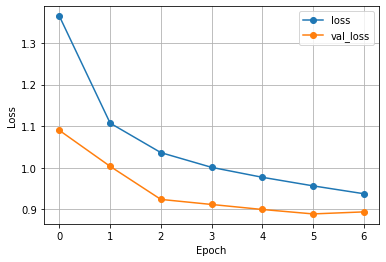

In [ ]:
plt.plot(cnn5_FastText.history['loss'], label='loss', marker='o')
plt.plot(cnn5_FastText.history['val_loss'], label = 'val_loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid()

### LSTM 5 classi con FastText

In [ ]:
input = Input(shape=(maxlen, )) 
x   =  embedding_layer(input)
x   =  LSTM(60, return_sequences=True,name='lstm_layer')(x)
x   =  GlobalMaxPool1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(5, activation="softmax")(x)

In [ ]:
model = Model(inputs=input, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
lstm5_FastText = model.fit(X_train_final, y_train, epochs=7,validation_split=0.2)

Epoch 1/7
815/815 [==============================] - 46s 50ms/step - loss: 1.1854 - accuracy: 0.4902 - val_loss: 0.9340 - val_accuracy: 0.6208
Epoch 2/7
815/815 [==============================] - 37s 45ms/step - loss: 0.8933 - accuracy: 0.6471 - val_loss: 0.8069 - val_accuracy: 0.6841
Epoch 3/7
815/815 [==============================] - 37s 45ms/step - loss: 0.7866 - accuracy: 0.6989 - val_loss: 0.7382 - val_accuracy: 0.7189
Epoch 4/7
815/815 [==============================] - 37s 45ms/step - loss: 0.7040 - accuracy: 0.7376 - val_loss: 0.7008 - val_accuracy: 0.7369
Epoch 5/7
815/815 [==============================] - 37s 45ms/step - loss: 0.6281 - accuracy: 0.7706 - val_loss: 0.6912 - val_accuracy: 0.7381
Epoch 6/7
815/815 [==============================] - 39s 48ms/step - loss: 0.5603 - accuracy: 0.7986 - val_loss: 0.6916 - val_accuracy: 0.7438
Epoch 7/7
815/815 [==============================] - 37s 45ms/step - loss: 0.5027 - accuracy: 0.8237 - val_loss: 0.7049 - val_accuracy: 0.7436

In [ ]:
lstm5_FastText_pred = np.round(model.predict(X_test_final))

In [ ]:
print('Accuracy %s' % accuracy_score(y_test, lstm5_FastText_pred))
print('F1-score %s' % f1_score(y_test, lstm5_FastText_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm5_FastText_pred))

Accuracy 0.6781376518218624
F1-score [0.6394756  0.75869336 0.67803279 0.73246136 0.7934224 ]
Classification report:
              precision    recall  f1-score   support

           0       0.68      0.61      0.64       725
           1       0.77      0.75      0.76       482
           2       0.72      0.64      0.68       811
           3       0.79      0.69      0.73       449
           4       0.81      0.78      0.79       497

   micro avg       0.75      0.68      0.71      2964
   macro avg       0.75      0.69      0.72      2964
weighted avg       0.74      0.68      0.71      2964
 samples avg       0.68      0.68      0.68      2964



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


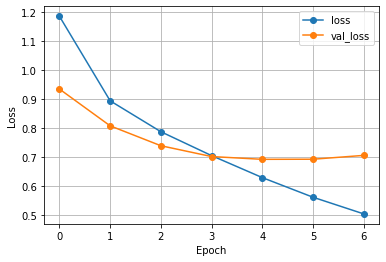

In [ ]:
plt.plot(lstm5_FastText.history['loss'], label='loss', marker = 'o')
plt.plot(lstm5_FastText.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

### Caricamento embedding GloVe for tweets

In [ ]:
import codecs
#load embeddings
print('loading word embeddings...')
embeddings_index_glove = {}
f = codecs.open('../content/drive/MyDrive/Colab Notebooks/glove.twitter.27B.200d.txt', encoding='utf-8')
for line in f:
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index_glove[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index_glove))

loading word embeddings...
found 1193515 word vectors


In [ ]:
with open('../content/drive/MyDrive/Colab Notebooks/embeddings_GLOVE_index.pkl',mode='bw') as outputfile:
    pickle.dump(embeddings_index_glove ,outputfile)

In [ ]:
with open('../content/drive/MyDrive/Colab Notebooks/embeddings_GLOVE_index.pkl',mode='br') as inputfile:
    embeddings_index_glove= pickle.load(inputfile)

### Preparazione DNN 5 classi GloVe

In [ ]:
y_train = df['New_Sentiment']
y_test  = df_test['New_Sentiment']

In [ ]:
y_train = to_categorical(y_train, 5)
y_test  = to_categorical(y_test, 5)

In [ ]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(x_train))
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)
word_index = tokenizer.word_index
print("dictionary size: ", len(word_index))


dictionary size:  73013


In [ ]:
word_index

{'the': 1,
 'to': 2,
 '\r\r': 3,
 't': 4,
 'co': 5,
 'https': 6,
 'and': 7,
 'of': 8,
 'a': 9,
 'in': 10,
 'coronavirus': 11,
 '19': 12,
 'covid': 13,
 'for': 14,
 'is': 15,
 'are': 16,
 'on': 17,
 'you': 18,
 'i': 19,
 'this': 20,
 'at': 21,
 'prices': 22,
 'food': 23,
 'supermarket': 24,
 'store': 25,
 'with': 26,
 'we': 27,
 'grocery': 28,
 'that': 29,
 'as': 30,
 'have': 31,
 'be': 32,
 'it': 33,
 'from': 34,
 'amp': 35,
 'people': 36,
 'covid19': 37,
 'consumer': 38,
 'all': 39,
 'your': 40,
 'will': 41,
 'not': 42,
 'our': 43,
 'my': 44,
 'up': 45,
 'has': 46,
 'out': 47,
 'more': 48,
 'or': 49,
 'by': 50,
 'they': 51,
 'can': 52,
 'shopping': 53,
 'online': 54,
 'if': 55,
 'but': 56,
 'how': 57,
 'during': 58,
 'pandemic': 59,
 'their': 60,
 'now': 61,
 'so': 62,
 'about': 63,
 'no': 64,
 'get': 65,
 'need': 66,
 'what': 67,
 'who': 68,
 'just': 69,
 'workers': 70,
 'panic': 71,
 'us': 72,
 'time': 73,
 'demand': 74,
 'like': 75,
 'do': 76,
 'sanitizer': 77,
 'an': 78,
 'home': 

In [ ]:
maxlen = 200
embed_size = 200 #perchè i pretrained glove hanno dim 200
X_train_final = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test_final = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [ ]:
#embedding matrix
print('preparing embedding matrix...')
words_not_found = []
nb_words = min(max_features, len(word_index))
embedding_matrix = np.zeros((nb_words, embed_size))
for word, i in word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index_glove.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))


preparing embedding matrix...
number of null word embeddings: 4681


In [ ]:
words_not_found 

['\r\r',
 '19',
 'covid',
 'covid19',
 'covid2019',
 '2',
 '1',
 '3',
 "it's",
 'socialdistancing',
 "don't",
 'itâ\x92s',
 '4',
 'donâ\x92t',
 "i'm",
 'coronacrisis',
 'iâ\x92m',
 '5',
 '2020',
 '10',
 '000',
 'coronavirus\r\r',
 '20',
 '6',
 "can't",
 'coronaviruspandemic',
 'coronavirusoutbreak',
 'canâ\x92t',
 'â\x94',
 'stayathome',
 '100',
 'panicbuying',
 '7',
 'stayhomesavelives',
 '50',
 '30',
 "we're",
 'stophoarding',
 "you're",
 '8',
 '19\r\r',
 'â\x97',
 "i've",
 '15',
 'youâ\x92re',
 'â\x96',
 'covid19uk',
 '9',
 'coronavirusupdate',
 'weâ\x92re',
 "here's",
 '12',
 'iâ\x92ve',
 '25',
 'handsanitizer',
 "that's",
 'realdonaldtrump',
 'quarantinelife',
 'stoppanicbuying',
 "they're",
 "there's",
 '24',
 '60',
 'borisjohnson',
 'coronavirusuk',
 'â\x95',
 '99',
 "won't",
 '14',
 'thereâ\x92s',
 'thatâ\x92s',
 'theyâ\x92re',
 '40',
 "let's",
 'toiletpaperpanic',
 'covid19\r\r',
 'toiletpapercrisis',
 '11',
 "isn't",
 "didn't",
 "doesn't",
 'doesnâ\x92t',
 'isnâ\x92t',
 "what

In [ ]:
embedding_layer = Embedding(nb_words, embed_size,
          weights=[embedding_matrix], trainable=False)

### CNN 5 classi Glove

In [ ]:
input = Input(shape=(maxlen, )) 
x   =  embedding_layer(input)
x   =  Dropout(0.2)(x)
x   =  Conv1D(10, 3, padding='valid',activation='relu', strides=1)(x)
x   =  GlobalMaxPooling1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(32, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(5, activation="softmax")(x)

In [ ]:
model = Model(inputs=input, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
cnn5_glove= model.fit(X_train_final, y_train, epochs=30,validation_split=0.2)
cnn5_glove

Epoch 1/30
815/815 [==============================] - 16s 10ms/step - loss: 1.4256 - accuracy: 0.3568 - val_loss: 1.1845 - val_accuracy: 0.4810
Epoch 2/30
815/815 [==============================] - 7s 8ms/step - loss: 1.2177 - accuracy: 0.4665 - val_loss: 1.1024 - val_accuracy: 0.5201
Epoch 3/30
815/815 [==============================] - 7s 8ms/step - loss: 1.1608 - accuracy: 0.5034 - val_loss: 1.0640 - val_accuracy: 0.5464
Epoch 4/30
815/815 [==============================] - 7s 9ms/step - loss: 1.1324 - accuracy: 0.5165 - val_loss: 1.0397 - val_accuracy: 0.5580
Epoch 5/30
815/815 [==============================] - 7s 8ms/step - loss: 1.1069 - accuracy: 0.5307 - val_loss: 1.0323 - val_accuracy: 0.5679
Epoch 6/30
815/815 [==============================] - 7s 8ms/step - loss: 1.0943 - accuracy: 0.5362 - val_loss: 1.0129 - val_accuracy: 0.5784
Epoch 7/30
815/815 [==============================] - 7s 9ms/step - loss: 1.0803 - accuracy: 0.5439 - val_loss: 0.9949 - val_accuracy: 0.5892
Epoc

In [ ]:
cnn5_glove_pred = np.round(model.predict(X_test_final))

In [ ]:
print('Accuracy %s' % accuracy_score(y_test, cnn5_glove_pred))
print('F1-score %s' % f1_score(y_test, cnn5_glove_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn5_glove_pred))

Accuracy 0.4598515519568151
F1-score [0.51874522 0.53835425 0.40882103 0.59473024 0.70954774]
Classification report:
              precision    recall  f1-score   support

           0       0.58      0.47      0.52       725
           1       0.82      0.40      0.54       482
           2       0.65      0.30      0.41       811
           3       0.68      0.53      0.59       449
           4       0.71      0.71      0.71       497

   micro avg       0.67      0.46      0.55      2964
   macro avg       0.69      0.48      0.55      2964
weighted avg       0.68      0.46      0.54      2964
 samples avg       0.46      0.46      0.46      2964



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


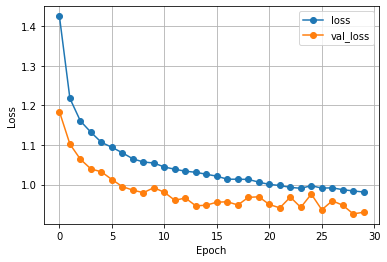

In [ ]:
plt.plot(cnn5_glove.history['loss'], label='loss', marker='o')
plt.plot(cnn5_glove.history['val_loss'], label = 'val_loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid()

### LSTM 5 classi Glove

In [ ]:
input = Input(shape=(maxlen, )) 
x   =  embedding_layer(input)
x   =  LSTM(60, return_sequences=True,name='lstm_layer')(x)
x   =  GlobalMaxPool1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(5, activation="softmax")(x)

In [ ]:
model = Model(inputs=input, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
lstm5_Glove = model.fit(X_train_final, y_train, epochs=7,validation_split=0.2)

Epoch 1/7
815/815 [==============================] - 47s 50ms/step - loss: 1.2286 - accuracy: 0.4689 - val_loss: 0.9991 - val_accuracy: 0.5897
Epoch 2/7
815/815 [==============================] - 37s 45ms/step - loss: 0.9638 - accuracy: 0.6110 - val_loss: 0.8860 - val_accuracy: 0.6466
Epoch 3/7
815/815 [==============================] - 37s 46ms/step - loss: 0.8480 - accuracy: 0.6696 - val_loss: 0.8099 - val_accuracy: 0.6835
Epoch 4/7
815/815 [==============================] - 37s 46ms/step - loss: 0.7606 - accuracy: 0.7142 - val_loss: 0.7772 - val_accuracy: 0.6974
Epoch 5/7
815/815 [==============================] - 40s 49ms/step - loss: 0.6894 - accuracy: 0.7446 - val_loss: 0.7727 - val_accuracy: 0.7068
Epoch 6/7
815/815 [==============================] - 37s 45ms/step - loss: 0.6215 - accuracy: 0.7708 - val_loss: 0.7573 - val_accuracy: 0.7157
Epoch 7/7
815/815 [==============================] - 37s 45ms/step - loss: 0.5618 - accuracy: 0.7940 - val_loss: 0.7793 - val_accuracy: 0.7080

In [ ]:
lstm5_Glove_pred = np.round(model.predict(X_test_final))

In [ ]:
print('Accuracy %s' % accuracy_score(y_test, lstm5_Glove_pred))
print('F1-score %s' % f1_score(y_test, lstm5_Glove_pred , average=None))
print('Classification report:')
print(classification_report(y_test, lstm5_Glove_pred ))

Accuracy 0.6494601889338731
F1-score [0.63766145 0.70154578 0.60382514 0.71959799 0.77219251]
Classification report:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       725
           1       0.82      0.61      0.70       482
           2       0.68      0.55      0.60       811
           3       0.66      0.80      0.72       449
           4       0.82      0.73      0.77       497

   micro avg       0.70      0.65      0.67      2964
   macro avg       0.72      0.67      0.69      2964
weighted avg       0.71      0.65      0.67      2964
 samples avg       0.65      0.65      0.65      2964



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


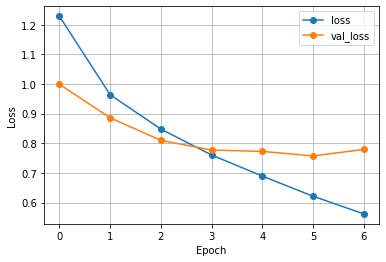

In [ ]:
plt.plot(lstm5_Glove.history['loss'], label='loss', marker = 'o')
plt.plot(lstm5_Glove.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

### Preprocessing per DNN 3 classi

In [ ]:
df['New_Sentiment'] = df['Sentiment']

cont = 0
for i in df['Sentiment']:
  if i == 'Positive':
    df['New_Sentiment'][cont] = 0
    cont+=1
  
  elif i == 'Extremely Positive':
    df['New_Sentiment'][cont] = 0
    cont+=1
  
  elif i == 'Negative':
    df['New_Sentiment'][cont] = 1
    cont+=1
  
  elif i == 'Extremely Negative':
    df['New_Sentiment'][cont] = 1
    cont+=1

  elif i == 'Neutral':
    df['New_Sentiment'][cont] = 2
    cont+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying

In [ ]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,New_Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,0
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,0
3,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,0
4,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,0
...,...,...,...,...,...,...,...
32562,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative,1
32563,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative,1
32564,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive,0
32565,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,2


In [ ]:
df_test['New_Sentiment'] = df_test['Sentiment']

cont = 0
for i in df_test['Sentiment']:
  if i == 'Positive':
    df_test['New_Sentiment'][cont] = 0
    cont+=1
  
  elif i == 'Extremely Positive':
    df_test['New_Sentiment'][cont] = 0
    cont+=1
  
  elif i == 'Negative':
    df_test['New_Sentiment'][cont] = 1
    cont+=1
  
  elif i == 'Extremely Negative':
    df_test['New_Sentiment'][cont] = 1
    cont+=1

  elif i == 'Neutral':
    df_test['New_Sentiment'][cont] = 2
    cont+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying

In [ ]:
df_test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,New_Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,1
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,0
2,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,1
3,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,2
4,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral,2
...,...,...,...,...,...,...,...
2959,3793,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative,1
2960,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,0
2961,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,1
2962,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,2


### CNN 3 classi

In [ ]:
y_train = df['New_Sentiment']
y_test  = df_test['New_Sentiment']

In [ ]:
y_train = to_categorical(y_train, 3)
y_test  = to_categorical(y_test, 3)

In [ ]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(x_train))
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)

In [ ]:
maxlen = 200
embed_size = 128 
X_train_final = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test_final = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [ ]:
input = Input(shape=(maxlen, )) 
x   =  Embedding(max_features, embed_size)(input)
x   =  Dropout(0.2)(x)
x   =  Conv1D(10, 3, padding='valid',activation='relu', strides=1)(x)
x   =  GlobalMaxPooling1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(32, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)

In [ ]:
model = Model(inputs=input, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
cnn3 = model.fit(X_train_final, y_train, epochs=2,validation_split=0.2)
cnn3

Epoch 1/2
815/815 [==============================] - 16s 17ms/step - loss: 0.7837 - accuracy: 0.6470 - val_loss: 0.5571 - val_accuracy: 0.7855
Epoch 2/2
815/815 [==============================] - 14s 17ms/step - loss: 0.4673 - accuracy: 0.8366 - val_loss: 0.4748 - val_accuracy: 0.8357


In [ ]:
cnn3_pred = np.round(model.predict(X_test_final))

In [ ]:
print('Accuracy %s' % accuracy_score(y_test, cnn3_pred))
print('F1-score %s' % f1_score(y_test, cnn3_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn3_pred))

Accuracy 0.7982456140350878
F1-score [0.82601351 0.81680947 0.78181818]
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1207
           1       0.84      0.79      0.82      1260
           2       0.78      0.78      0.78       497

   micro avg       0.83      0.80      0.81      2964
   macro avg       0.82      0.79      0.81      2964
weighted avg       0.83      0.80      0.81      2964
 samples avg       0.80      0.80      0.80      2964



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


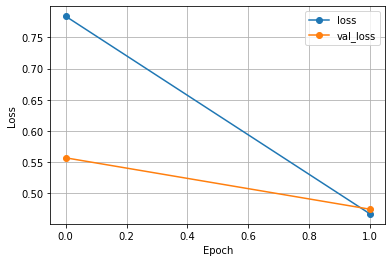

In [ ]:
plt.plot(cnn3.history['loss'], label='loss', marker = 'o')
plt.plot(cnn3.history['val_loss'], label = 'val_loss', marker= 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

### LSTM 3 classi

In [ ]:
y_train = df['New_Sentiment']
y_test  = df_test['New_Sentiment']

In [ ]:
y_train = to_categorical(y_train, 3)
y_test  = to_categorical(y_test, 3)

In [ ]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(x_train))
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)

In [ ]:
maxlen = 200
embed_size = 128 
X_train_final = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test_final = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [ ]:
input = Input(shape=(maxlen, )) 
x   =  Embedding(max_features, embed_size)(input)
x   =  LSTM(60, return_sequences=True,name='lstm_layer')(x)
x   =  GlobalMaxPool1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)

In [ ]:
model = Model(inputs=input, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
lstm3 = model.fit(X_train_final, y_train, epochs=2,validation_split=0.2)

Epoch 1/2
815/815 [==============================] - 50s 55ms/step - loss: 0.6659 - accuracy: 0.7171 - val_loss: 0.4282 - val_accuracy: 0.8558
Epoch 2/2
815/815 [==============================] - 43s 52ms/step - loss: 0.3329 - accuracy: 0.8898 - val_loss: 0.3993 - val_accuracy: 0.8638


In [ ]:
lstm3_pred = np.round(model.predict(X_test_final))

In [ ]:
print('Accuracy %s' % accuracy_score(y_test, lstm3_pred))
print('F1-score %s' % f1_score(y_test, lstm3_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm3_pred))

Accuracy 0.8326585695006747
F1-score [0.85666805 0.8541329  0.81058201]
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1207
           1       0.87      0.84      0.85      1260
           2       0.85      0.77      0.81       497

   micro avg       0.86      0.83      0.85      2964
   macro avg       0.86      0.82      0.84      2964
weighted avg       0.86      0.83      0.85      2964
 samples avg       0.83      0.83      0.83      2964



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


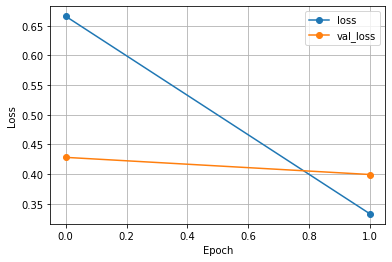

In [ ]:
plt.plot(lstm3.history['loss'], label='loss', marker = 'o')
plt.plot(lstm3.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

### Preparazione DNN 3 classe con FastText

In [ ]:
y_train = df['New_Sentiment']
y_test  = df_test['New_Sentiment']

In [ ]:
y_train = to_categorical(y_train, 3)
y_test  = to_categorical(y_test, 3)

In [ ]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(x_train))
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)
word_index = tokenizer.word_index
print("dictionary size: ", len(word_index))


dictionary size:  73013


In [ ]:
word_index

{'the': 1,
 'to': 2,
 '\r\r': 3,
 't': 4,
 'co': 5,
 'https': 6,
 'and': 7,
 'of': 8,
 'a': 9,
 'in': 10,
 'coronavirus': 11,
 '19': 12,
 'covid': 13,
 'for': 14,
 'is': 15,
 'are': 16,
 'on': 17,
 'you': 18,
 'i': 19,
 'this': 20,
 'at': 21,
 'prices': 22,
 'food': 23,
 'supermarket': 24,
 'store': 25,
 'with': 26,
 'we': 27,
 'grocery': 28,
 'that': 29,
 'as': 30,
 'have': 31,
 'be': 32,
 'it': 33,
 'from': 34,
 'amp': 35,
 'people': 36,
 'covid19': 37,
 'consumer': 38,
 'all': 39,
 'your': 40,
 'will': 41,
 'not': 42,
 'our': 43,
 'my': 44,
 'up': 45,
 'has': 46,
 'out': 47,
 'more': 48,
 'or': 49,
 'by': 50,
 'they': 51,
 'can': 52,
 'shopping': 53,
 'online': 54,
 'if': 55,
 'but': 56,
 'how': 57,
 'during': 58,
 'pandemic': 59,
 'their': 60,
 'now': 61,
 'so': 62,
 'about': 63,
 'no': 64,
 'get': 65,
 'need': 66,
 'what': 67,
 'who': 68,
 'just': 69,
 'workers': 70,
 'panic': 71,
 'us': 72,
 'time': 73,
 'demand': 74,
 'like': 75,
 'do': 76,
 'sanitizer': 77,
 'an': 78,
 'home': 

In [ ]:
maxlen = 200
embed_size = 300 
X_train_final = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test_final = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [ ]:
#embedding matrix
print('preparing embedding matrix...')
words_not_found = []
nb_words = min(max_features, len(word_index))
embedding_matrix = np.zeros((nb_words, embed_size))
for word, i in word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))


preparing embedding matrix...
number of null word embeddings: 4173


In [ ]:
words_not_found 

['\r\r',
 'covid',
 'covid19',
 'covid2019',
 'socialdistancing',
 'itâ\x92s',
 'donâ\x92t',
 "i'm",
 'coronacrisis',
 'iâ\x92m',
 'coronavirus\r\r',
 'coronaviruspandemic',
 'stayhome',
 'coronavirusoutbreak',
 'canâ\x92t',
 'â\x94',
 'stayathome',
 'panicbuying',
 'stayhomesavelives',
 'stophoarding',
 '19\r\r',
 'â\x97',
 "i've",
 'youâ\x92re',
 'â\x96',
 'covid19uk',
 'staysafe',
 'coronavirusupdate',
 'weâ\x92re',
 "here's",
 'iâ\x92ve',
 'handsanitizer',
 'quarantinelife',
 'stoppanicbuying',
 'borisjohnson',
 'coronavirusuk',
 'â\x95',
 'thereâ\x92s',
 'thatâ\x92s',
 'theyâ\x92re',
 "let's",
 'toiletpaperpanic',
 'covid19\r\r',
 'toiletpapercrisis',
 'doesnâ\x92t',
 'isnâ\x92t',
 "what's",
 'letâ\x92s',
 'coronavirususa',
 'whatâ\x92s',
 "aren't",
 'wonâ\x92t',
 'coronaviruslockdown',
 'hereâ\x92s',
 'panicbuyinguk',
 'didnâ\x92t',
 'â\x94\r\r',
 'toiletpaperapocalypse',
 "we've",
 'washyourhands',
 'â\x85',
 'pricegouging',
 'arenâ\x92t',
 'prices\r\r',
 'narendramodi',
 'flatt

In [ ]:
embedding_layer = Embedding(nb_words, embed_size,
          weights=[embedding_matrix], trainable=False)

### CNN 3 classi con FastText

In [ ]:
input = Input(shape=(maxlen, )) 
x   =  embedding_layer(input)
x   =  Dropout(0.2)(x)
x   =  Conv1D(10, 3, padding='valid',activation='relu', strides=1)(x)
x   =  GlobalMaxPooling1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(32, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)

In [ ]:
model = Model(inputs=input, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
cnn3_FastText = model.fit(X_train_final, y_train, epochs=10,validation_split=0.2)
cnn3_FastText

Epoch 1/10
815/815 [==============================] - 12s 13ms/step - loss: 0.8264 - accuracy: 0.6238 - val_loss: 0.6435 - val_accuracy: 0.7419
Epoch 2/10
815/815 [==============================] - 10s 12ms/step - loss: 0.6584 - accuracy: 0.7395 - val_loss: 0.5819 - val_accuracy: 0.7722
Epoch 3/10
815/815 [==============================] - 10s 12ms/step - loss: 0.6065 - accuracy: 0.7628 - val_loss: 0.5596 - val_accuracy: 0.7835
Epoch 4/10
815/815 [==============================] - 8s 10ms/step - loss: 0.5762 - accuracy: 0.7798 - val_loss: 0.5419 - val_accuracy: 0.7924
Epoch 5/10
815/815 [==============================] - 8s 10ms/step - loss: 0.5598 - accuracy: 0.7859 - val_loss: 0.5168 - val_accuracy: 0.8023
Epoch 6/10
815/815 [==============================] - 7s 9ms/step - loss: 0.5412 - accuracy: 0.7940 - val_loss: 0.5261 - val_accuracy: 0.8027
Epoch 7/10
815/815 [==============================] - 8s 10ms/step - loss: 0.5316 - accuracy: 0.8029 - val_loss: 0.5306 - val_accuracy: 0.79

In [ ]:
cnn3_FastText_pred = np.round(model.predict(X_test_final))

In [ ]:
print('Accuracy %s' % accuracy_score(y_test, cnn3_FastText_pred))
print('F1-score %s' % f1_score(y_test, cnn3_FastText_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn3_FastText_pred))

Accuracy 0.7780026990553306
F1-score [0.78460128 0.81619938 0.76208531]
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.78      1207
           1       0.80      0.83      0.82      1260
           2       0.72      0.81      0.76       497

   micro avg       0.81      0.78      0.79      2964
   macro avg       0.80      0.78      0.79      2964
weighted avg       0.82      0.78      0.79      2964
 samples avg       0.78      0.78      0.78      2964



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


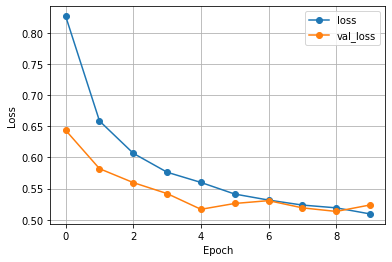

In [ ]:
plt.plot(cnn3_FastText.history['loss'], label='loss', marker='o')
plt.plot(cnn3_FastText.history['val_loss'], label = 'val_loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid()

### LSTM 3 classi con FastText

In [ ]:
input = Input(shape=(maxlen, )) 
x   =  embedding_layer(input)
x   =  LSTM(60, return_sequences=True,name='lstm_layer')(x)
x   =  GlobalMaxPool1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)

In [ ]:
model = Model(inputs=input, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
lstm3_FastText = model.fit(X_train_final, y_train, epochs=4,validation_split=0.2)

Epoch 1/4
815/815 [==============================] - 40s 46ms/step - loss: 0.7065 - accuracy: 0.7016 - val_loss: 0.5473 - val_accuracy: 0.7851
Epoch 2/4
815/815 [==============================] - 37s 45ms/step - loss: 0.5090 - accuracy: 0.8180 - val_loss: 0.4648 - val_accuracy: 0.8279
Epoch 3/4
815/815 [==============================] - 37s 45ms/step - loss: 0.4254 - accuracy: 0.8546 - val_loss: 0.4311 - val_accuracy: 0.8423
Epoch 4/4
815/815 [==============================] - 37s 45ms/step - loss: 0.3577 - accuracy: 0.8794 - val_loss: 0.4176 - val_accuracy: 0.8428


In [ ]:
lstm3_FastText_pred = np.round(model.predict(X_test_final))

In [ ]:
print('Accuracy %s' % accuracy_score(y_test, lstm3_FastText_pred))
print('F1-score %s' % f1_score(y_test, lstm3_FastText_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm3_FastText_pred))

Accuracy 0.8211875843454791
F1-score [0.84950658 0.84408163 0.79180151]
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1207
           1       0.87      0.82      0.84      1260
           2       0.85      0.74      0.79       497

   micro avg       0.86      0.82      0.84      2964
   macro avg       0.86      0.80      0.83      2964
weighted avg       0.86      0.82      0.84      2964
 samples avg       0.82      0.82      0.82      2964



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


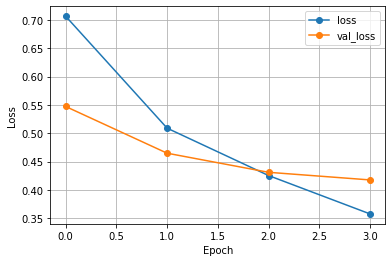

In [ ]:
plt.plot(lstm3_FastText.history['loss'], label='loss', marker = 'o')
plt.plot(lstm3_FastText.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

### Preparazione DNN 3 classi GloVe for tweets

In [ ]:
y_train = df['New_Sentiment']
y_test  = df_test['New_Sentiment']

In [ ]:
y_train = to_categorical(y_train, 3)
y_test  = to_categorical(y_test, 3)

In [ ]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(x_train))
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)
word_index = tokenizer.word_index
print("dictionary size: ", len(word_index))


dictionary size:  73013


In [ ]:
word_index

{'the': 1,
 'to': 2,
 '\r\r': 3,
 't': 4,
 'co': 5,
 'https': 6,
 'and': 7,
 'of': 8,
 'a': 9,
 'in': 10,
 'coronavirus': 11,
 '19': 12,
 'covid': 13,
 'for': 14,
 'is': 15,
 'are': 16,
 'on': 17,
 'you': 18,
 'i': 19,
 'this': 20,
 'at': 21,
 'prices': 22,
 'food': 23,
 'supermarket': 24,
 'store': 25,
 'with': 26,
 'we': 27,
 'grocery': 28,
 'that': 29,
 'as': 30,
 'have': 31,
 'be': 32,
 'it': 33,
 'from': 34,
 'amp': 35,
 'people': 36,
 'covid19': 37,
 'consumer': 38,
 'all': 39,
 'your': 40,
 'will': 41,
 'not': 42,
 'our': 43,
 'my': 44,
 'up': 45,
 'has': 46,
 'out': 47,
 'more': 48,
 'or': 49,
 'by': 50,
 'they': 51,
 'can': 52,
 'shopping': 53,
 'online': 54,
 'if': 55,
 'but': 56,
 'how': 57,
 'during': 58,
 'pandemic': 59,
 'their': 60,
 'now': 61,
 'so': 62,
 'about': 63,
 'no': 64,
 'get': 65,
 'need': 66,
 'what': 67,
 'who': 68,
 'just': 69,
 'workers': 70,
 'panic': 71,
 'us': 72,
 'time': 73,
 'demand': 74,
 'like': 75,
 'do': 76,
 'sanitizer': 77,
 'an': 78,
 'home': 

In [ ]:
maxlen = 200
embed_size = 200 #perchè i pretrained glove hanno dim 200
X_train_final = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test_final = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [ ]:
#embedding matrix
print('preparing embedding matrix...')
words_not_found = []
nb_words = min(max_features, len(word_index))
embedding_matrix = np.zeros((nb_words, embed_size))
for word, i in word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index_glove.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))


preparing embedding matrix...
number of null word embeddings: 4681


In [ ]:
words_not_found 

['\r\r',
 '19',
 'covid',
 'covid19',
 'covid2019',
 '2',
 '1',
 '3',
 "it's",
 'socialdistancing',
 "don't",
 'itâ\x92s',
 '4',
 'donâ\x92t',
 "i'm",
 'coronacrisis',
 'iâ\x92m',
 '5',
 '2020',
 '10',
 '000',
 'coronavirus\r\r',
 '20',
 '6',
 "can't",
 'coronaviruspandemic',
 'coronavirusoutbreak',
 'canâ\x92t',
 'â\x94',
 'stayathome',
 '100',
 'panicbuying',
 '7',
 'stayhomesavelives',
 '50',
 '30',
 "we're",
 'stophoarding',
 "you're",
 '8',
 '19\r\r',
 'â\x97',
 "i've",
 '15',
 'youâ\x92re',
 'â\x96',
 'covid19uk',
 '9',
 'coronavirusupdate',
 'weâ\x92re',
 "here's",
 '12',
 'iâ\x92ve',
 '25',
 'handsanitizer',
 "that's",
 'realdonaldtrump',
 'quarantinelife',
 'stoppanicbuying',
 "they're",
 "there's",
 '24',
 '60',
 'borisjohnson',
 'coronavirusuk',
 'â\x95',
 '99',
 "won't",
 '14',
 'thereâ\x92s',
 'thatâ\x92s',
 'theyâ\x92re',
 '40',
 "let's",
 'toiletpaperpanic',
 'covid19\r\r',
 'toiletpapercrisis',
 '11',
 "isn't",
 "didn't",
 "doesn't",
 'doesnâ\x92t',
 'isnâ\x92t',
 "what

In [ ]:
embedding_layer = Embedding(nb_words, embed_size,
          weights=[embedding_matrix], trainable=False)

### CNN 3 classi Glove

In [ ]:
input = Input(shape=(maxlen, )) 
x   =  embedding_layer(input)
x   =  Dropout(0.2)(x)
x   =  Conv1D(10, 3, padding='valid',activation='relu', strides=1)(x)
x   =  GlobalMaxPooling1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(32, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)

In [ ]:
model = Model(inputs=input, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
cnn3_glove= model.fit(X_train_final, y_train, epochs=20,validation_split=0.2)
cnn3_glove

Epoch 1/20
815/815 [==============================] - 8s 9ms/step - loss: 0.8805 - accuracy: 0.5878 - val_loss: 0.7197 - val_accuracy: 0.6982
Epoch 2/20
815/815 [==============================] - 7s 9ms/step - loss: 0.7275 - accuracy: 0.6976 - val_loss: 0.6566 - val_accuracy: 0.7280
Epoch 3/20
815/815 [==============================] - 8s 9ms/step - loss: 0.6823 - accuracy: 0.7221 - val_loss: 0.6345 - val_accuracy: 0.7375
Epoch 4/20
815/815 [==============================] - 8s 10ms/step - loss: 0.6604 - accuracy: 0.7320 - val_loss: 0.6074 - val_accuracy: 0.7538
Epoch 5/20
815/815 [==============================] - 7s 9ms/step - loss: 0.6452 - accuracy: 0.7402 - val_loss: 0.5907 - val_accuracy: 0.7637
Epoch 6/20
815/815 [==============================] - 7s 9ms/step - loss: 0.6323 - accuracy: 0.7499 - val_loss: 0.5942 - val_accuracy: 0.7562
Epoch 7/20
815/815 [==============================] - 7s 9ms/step - loss: 0.6215 - accuracy: 0.7516 - val_loss: 0.5830 - val_accuracy: 0.7590
Epoch

In [ ]:
cnn3_glove_pred = np.round(model.predict(X_test_final))

In [ ]:
print('Accuracy %s' % accuracy_score(y_test, cnn3_glove_pred))
print('F1-score %s' % f1_score(y_test, cnn3_glove_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn3_glove_pred))

Accuracy 0.7469635627530364
F1-score [0.79282358 0.7839196  0.6993007 ]
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1207
           1       0.83      0.74      0.78      1260
           2       0.69      0.70      0.70       497

   micro avg       0.80      0.75      0.77      2964
   macro avg       0.78      0.74      0.76      2964
weighted avg       0.80      0.75      0.77      2964
 samples avg       0.75      0.75      0.75      2964



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


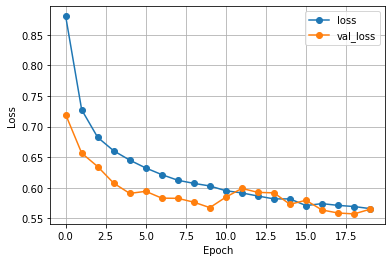

In [ ]:
plt.plot(cnn3_glove.history['loss'], label='loss', marker='o')
plt.plot(cnn3_glove.history['val_loss'], label = 'val_loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid()

### LSTM 3 classi Glove

In [ ]:
input = Input(shape=(maxlen, )) 
x   =  embedding_layer(input)
x   =  LSTM(60, return_sequences=True,name='lstm_layer')(x)
x   =  GlobalMaxPool1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)

In [ ]:
model = Model(inputs=input, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
lstm3_Glove = model.fit(X_train_final, y_train, epochs=4,validation_split=0.2)

Epoch 1/4
815/815 [==============================] - 44s 47ms/step - loss: 0.7345 - accuracy: 0.6828 - val_loss: 0.5894 - val_accuracy: 0.7614
Epoch 2/4
815/815 [==============================] - 37s 45ms/step - loss: 0.5373 - accuracy: 0.7965 - val_loss: 0.4846 - val_accuracy: 0.8123
Epoch 3/4
815/815 [==============================] - 36s 44ms/step - loss: 0.4542 - accuracy: 0.8383 - val_loss: 0.4547 - val_accuracy: 0.8321
Epoch 4/4
815/815 [==============================] - 36s 45ms/step - loss: 0.3923 - accuracy: 0.8653 - val_loss: 0.4334 - val_accuracy: 0.8453


In [ ]:
lstm3_Glove_pred = np.round(model.predict(X_test_final))

In [ ]:
print('Accuracy %s' % accuracy_score(y_test, lstm3_Glove_pred))
print('F1-score %s' % f1_score(y_test, lstm3_Glove_pred , average=None))
print('Classification report:')
print(classification_report(y_test, lstm3_Glove_pred ))

Accuracy 0.8147773279352226
F1-score [0.8375053  0.83929273 0.77170418]
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1207
           1       0.83      0.85      0.84      1260
           2       0.83      0.72      0.77       497

   micro avg       0.84      0.81      0.83      2964
   macro avg       0.84      0.80      0.82      2964
weighted avg       0.84      0.81      0.83      2964
 samples avg       0.81      0.81      0.81      2964



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


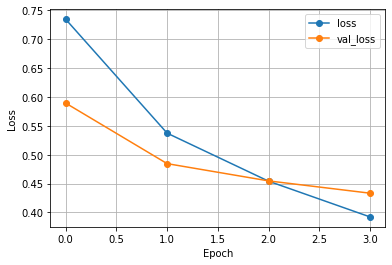

In [ ]:
plt.plot(lstm3_Glove.history['loss'], label='loss', marker = 'o')
plt.plot(lstm3_Glove.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')